## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible 
#(NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
diabetes_data[columns] = diabetes_data[columns].replace(0, np.nan)

In [6]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [7]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Plot histograms of each column. </font>**

C:\Users\grace\anaconda3\envs\TestEnv7\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\grace\anaconda3\envs\TestEnv7\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


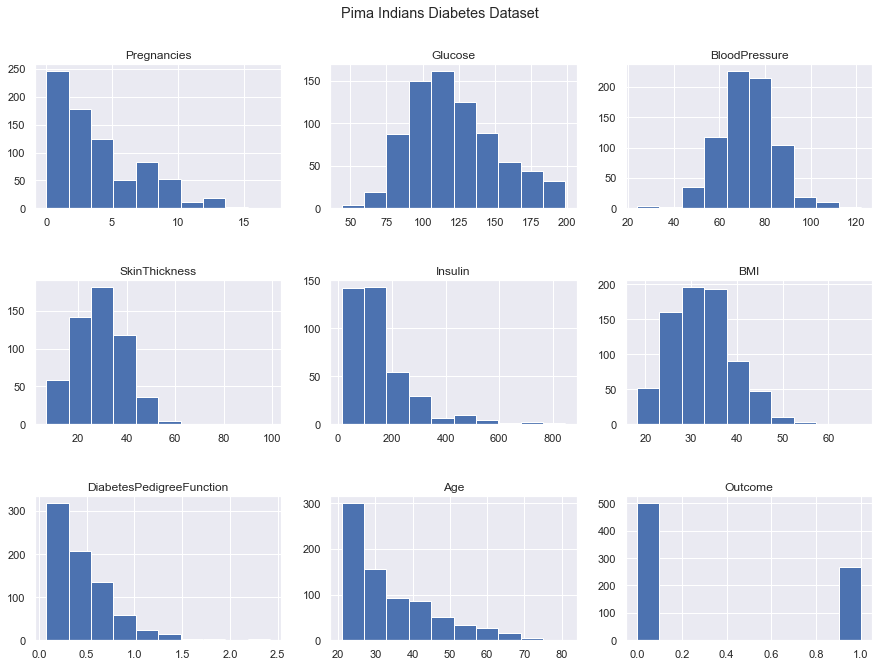

In [8]:
#we can use seaborn's pairplot to display all the histrograms,
#but it takes some time to compute. Comment out the line below to use pairplot,
#otherwise we just print all the histrograms individually.

#_=sns.pairplot(diabetes_data) 

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(15,10))
_=fig.suptitle('Pima Indians Diabetes Dataset')
_=fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
_=ax1.hist(diabetes_data.iloc[:,0])
_=ax1.set_title(diabetes_data.columns[0])
_=ax2.hist(diabetes_data.iloc[:,1])
_=ax2.set_title(diabetes_data.columns[1])
_=ax3.hist(diabetes_data.iloc[:,2])
_=ax3.set_title(diabetes_data.columns[2])
_=ax4.hist(diabetes_data.iloc[:,3])
_=ax4.set_title(diabetes_data.columns[3])
_=ax5.hist(diabetes_data.iloc[:,4])
_=ax5.set_title(diabetes_data.columns[4])
_=ax6.hist(diabetes_data.iloc[:,5])
_=ax6.set_title(diabetes_data.columns[5])
_=ax7.hist(diabetes_data.iloc[:,6])
_=ax7.set_title(diabetes_data.columns[6])
_=ax8.hist(diabetes_data.iloc[:,7])
_=ax8.set_title(diabetes_data.columns[7])
_=ax9.hist(diabetes_data.iloc[:,8])
_=ax9.set_title(diabetes_data.columns[8])

#### Replace the zeros with mean and median values.

In [9]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

In [10]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

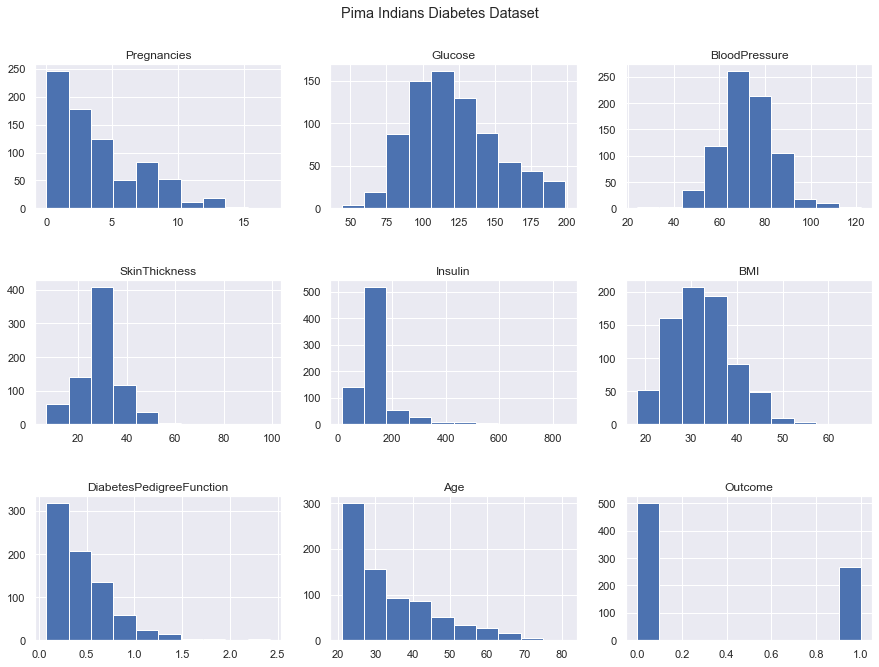

In [11]:
#_=sns.pairplot(diabetes_data) 

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(15,10))
_=fig.suptitle('Pima Indians Diabetes Dataset')
_=fig.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
_=ax1.hist(diabetes_data.iloc[:,0])
_=ax1.set_title(diabetes_data.columns[0])
_=ax2.hist(diabetes_data.iloc[:,1])
_=ax2.set_title(diabetes_data.columns[1])
_=ax3.hist(diabetes_data.iloc[:,2])
_=ax3.set_title(diabetes_data.columns[2])
_=ax4.hist(diabetes_data.iloc[:,3])
_=ax4.set_title(diabetes_data.columns[3])
_=ax5.hist(diabetes_data.iloc[:,4])
_=ax5.set_title(diabetes_data.columns[4])
_=ax6.hist(diabetes_data.iloc[:,5])
_=ax6.set_title(diabetes_data.columns[5])
_=ax7.hist(diabetes_data.iloc[:,6])
_=ax7.set_title(diabetes_data.columns[6])
_=ax8.hist(diabetes_data.iloc[:,7])
_=ax8.set_title(diabetes_data.columns[7])
_=ax9.hist(diabetes_data.iloc[:,8])
_=ax9.set_title(diabetes_data.columns[8])

#### Plot the correlation matrix heatmap

Correlation between various features


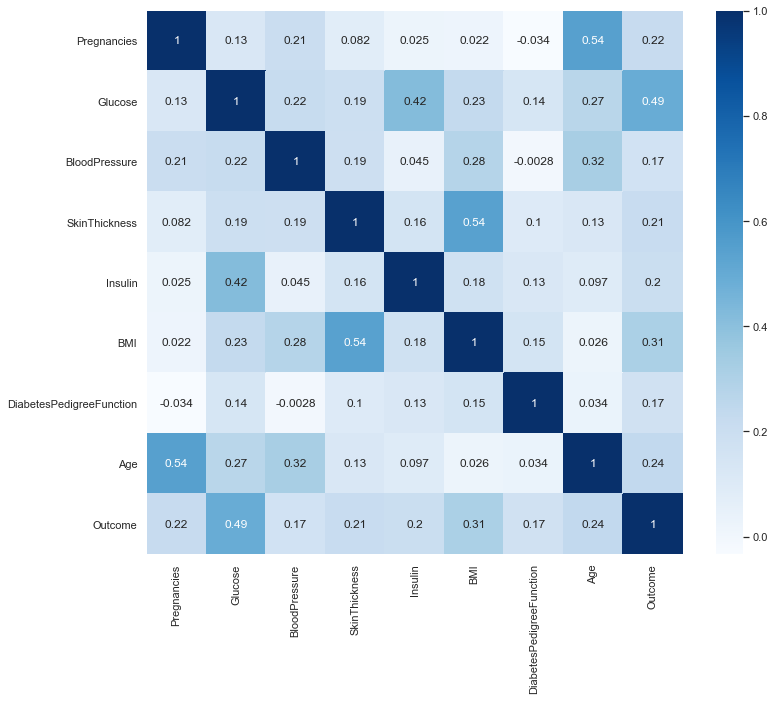

In [12]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [13]:
y = diabetes_data['Outcome']
X = diabetes_data.drop(columns='Outcome')

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train_scaled,y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled,y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [17]:
for i in range(len(test_scores)):
    print('N_neighbors:',i+1,', Train Score:', round(train_scores[i],4), ', Test Score:', round(test_scores[i], 4))

N_neighbors: 1 , Train Score: 1.0 , Test Score: 0.6667
N_neighbors: 2 , Train Score: 0.851 , Test Score: 0.671
N_neighbors: 3 , Train Score: 0.8547 , Test Score: 0.671
N_neighbors: 4 , Train Score: 0.8417 , Test Score: 0.6926
N_neighbors: 5 , Train Score: 0.8399 , Test Score: 0.7013
N_neighbors: 6 , Train Score: 0.8231 , Test Score: 0.684
N_neighbors: 7 , Train Score: 0.8343 , Test Score: 0.7316
N_neighbors: 8 , Train Score: 0.8212 , Test Score: 0.7359
N_neighbors: 9 , Train Score: 0.8268 , Test Score: 0.7316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [18]:
train_scores.index(max(train_scores))+1

1

**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [19]:
test_scores.index(max(test_scores))+1

8

Plot the train and test model performance by number of neighbors.

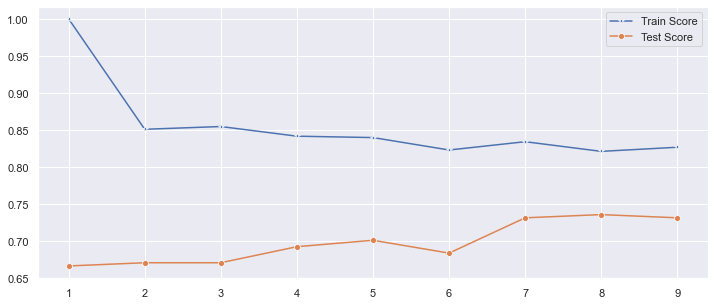

In [20]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [21]:
#Based on the plot, n_neighbors=8 appears to be the best.

knn = KNeighborsClassifier(8)
knn.fit(X_train_scaled,y_train)

train_score = knn.score(X_train_scaled,y_train)
test_score = knn.score(X_test_scaled,y_test)

print('Train Score:', round(train_score,2))
print('Test Score:', round(test_score,2))

Train Score: 0.82
Test Score: 0.74


In [22]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

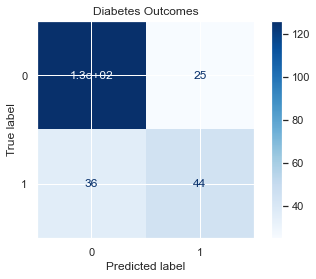

Confusion Matrix
[[126  25]
 [ 36  44]]


In [23]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(knn, X_test_scaled, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Diabetes Outcomes')
_=plt.show()
print('Confusion Matrix')
print(pl)

**<font color='teal'> Print the classification report </font>**

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       151
           1       0.64      0.55      0.59        80

    accuracy                           0.74       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.73      0.74      0.73       231



#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
# knn_cv.fit(X,y) #note, when I run this, I get n_neighbors = 31 in the next cell. I need to used the scaled X_train.
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

#### Print the best score and best parameter for n_neighbors.

In [26]:
print("Best Score:", str(knn_cv.best_score_))
print("Best Parameters:", str(knn_cv.best_params_))

Best Score: 0.7951021114572516
Best Parameters: {'n_neighbors': 11}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

(__Note from student:__ I got 11 in this grid search.)

**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Random Forest model.
</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train_scaled,y_train)

train_score = rf.score(X_train_scaled,y_train)
test_score = rf.score(X_test_scaled,y_test)

print('Train Score:', round(train_score,2))
print('Test Score:', round(test_score,2))
#we obviously get train score = 1.0, because we never limited the depth of the tree, 
# so it will sort every single occurence into its own category.

Train Score: 1.0
Test Score: 0.75


In [28]:
n_estimators = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
max_depth = [int(x) for x in np.linspace(start=3, stop=30, num = 10)]
min_samples_split = [int(n) for n in np.logspace(start=1, stop=2, num=10)]
min_samples_leaf = [int(n) for n in np.logspace(start=0, stop=1, num=4)]

#parameter grid to search for best param combination
param_grid = dict(n_estimators = n_estimators, 
                  max_depth = max_depth,  
                  min_samples_split = min_samples_split, 
                  min_samples_leaf = min_samples_leaf)

#create model
rf = RandomForestClassifier(random_state=42)

#instead of using GridSearchCV to iteratively search each combination, save time by using RandomizedSearchCV
#search 100 different combinations (n_iter=100) and use all processors (n_jobs=-1)
from sklearn.model_selection import RandomizedSearchCV
rf_cv= RandomizedSearchCV(estimator = rf, 
                          param_distributions = param_grid,
                          cv = 5,
                          n_iter = 100, 
                          random_state=42, 
                          n_jobs = -1,
                         )

rf_cv.fit(X_train_scaled, y_train)

print("Best Score:", str(rf_cv.best_score_))
print("Best Parameters:", str(rf_cv.best_params_))

Best Score: 0.7690031152647976
Best Parameters: {'n_estimators': 33, 'min_samples_split': 59, 'min_samples_leaf': 4, 'max_depth': 6}


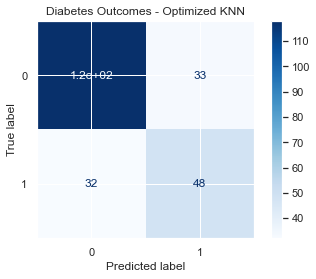

Confusion Matrix
[[118  33]
 [ 32  48]]

KNN Train Score: 0.8212
KNN Test Score: 0.7186


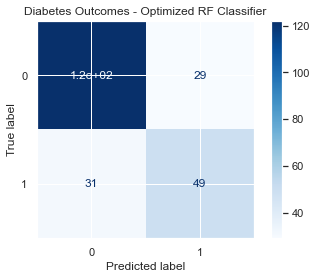

Confusion Matrix
[[122  29]
 [ 31  49]]

RF Train Score: 0.8156
RF Test Score: 0.7403


In [29]:
#Let's compare the confusion matrices and test scores between the optimized KNN and optimized RF

#KNN optimized: knn_cv
y_pred = knn_cv.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)
disp = plot_confusion_matrix(knn_cv, X_test_scaled, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Diabetes Outcomes - Optimized KNN')
_=plt.show()
print('Confusion Matrix')
print(pl)
print()
train_score = knn_cv.score(X_train_scaled,y_train)
test_score = knn_cv.score(X_test_scaled,y_test)
print('KNN Train Score:', round(train_score,4))
print('KNN Test Score:', round(test_score,4))

#RF optimized: rf_cv
y_pred = rf_cv.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)
disp = plot_confusion_matrix(rf_cv, X_test_scaled, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title('Diabetes Outcomes - Optimized RF Classifier')
_=plt.show()
print('Confusion Matrix')
print(pl)
print()
train_score = rf_cv.score(X_train_scaled,y_train)
test_score = rf_cv.score(X_test_scaled,y_test)
print('RF Train Score:', round(train_score,4))
print('RF Test Score:', round(test_score,4))

__Conclusion:__ Using GridSearchCV on our KNN classifier, we found that the optimal number of neighbors is 11. Using RandomizedSearchCV on our RF classifier, we found that the best parameters were {'n_estimators': 33, 'min_samples_split': 59, 'min_samples_leaf': 4, 'max_depth': 6}. The use of GridSearchCV and RandomizedSearchCV (the latter when there's a large range of parameters we want to search between) is an efficient and effective way to optimize the hyperparameters of our classifier, which in turn optimizes the parameters of the model.

Overall, the RF Classifier performed better than the KNN classifier, so it is the clear winner here. However, there may be cases in the future where we encounter one model which has fewer Type 1 errors (false positives) while another has fewer Type 2 errors (false negatives). In the case of predicting a diabetes diagnosis, it is better to minimize Type 2 errors (mistakenly telling someone with diabetes that they don't have diabetes), since those who fall under Type 1 errors can have follow-up tests to determine whether or not they are actually diabetic. Lucky for us, RF works better than KNN here.

Interestingly, the optimized RF performs worse than the unoptimized RF (regular rf has test and train score of 1.0 and 0.75, while rf_cv has 0.82 and 0.74). It's possible in the randomized search that some of the more optimal settings were missed.